# Example from La Palma
- This notebook shows how to convert the Raman-based FI densities from Dayton et al. (2023) into pressures and depths in the crust
- This assumes +-50K error in entrapment temperature, and an error in CO2 density of 0.002925 g/cm3
- Depth is calculated using a 2-step density profile, with 2.8 g/cm3 above the Moho, and 3.1 g/cm3 below
- You can download the excel spreadsheet here. 
- https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Dayton_et_al_2023_LaPalma_Example.xlsx

### Install DiadFit if you havent already! You might also have to install CoolProp if you want to use Span and Wagner EOS - the error message will give you instructions, else reach out

In [1]:
#!pip install --upgrade DiadFit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.91'

## Lets load in the data

In [3]:
# Get from here: https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Dayton_et_al_2023_LaPalma_Example.xlsx
data=pd.read_excel('Dayton_et_al_2023_LaPalma_Example.xlsx',
                   sheet_name='Sheet1')
data.head()

,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
0,0,03 LM0 G1 FI1,0.875343,LM0_G1_RIM,0.009036,42.12351,39.90642,0.018331,0.000023,0.005965,0.213926,0.034901,17.91823,0.292019,0.078602,0.190220,100.7912,0.807341
1,0,06 LM0 G2 FI1,0.780430,LM0_G2_CENTER,0.009698,44.42279,39.70696,0.008494,0.000023,0.000412,0.322745,0.022287,15.26419,0.225410,0.018465,0.194827,100.1963,0.838388
2,0,17 LM0 G3 FI3,0.936785,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
3,0,11 LM0 G3 FI1 (CRR),0.928828,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
4,0,19 LM0 G3 FI4,0.928514,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989


Text(0, 0.5, '# of meas')

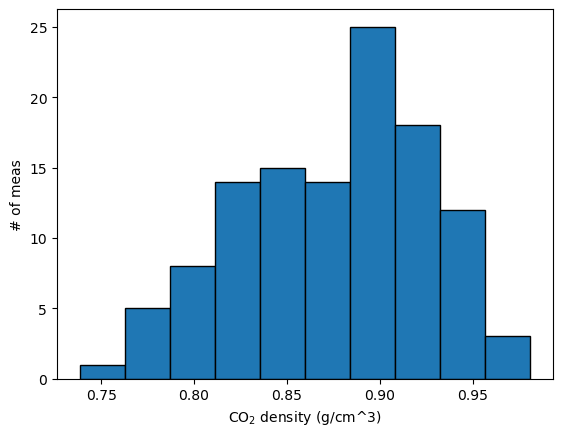

In [5]:
plt.hist(data['Density (g/cm^3)'], ec='k')
plt.xlabel('CO$_2$ density (g/cm^3)')
plt.ylabel('# of meas')

## Now lets propagate uncertainty in each fluid inclusion
- Here we use a temperature of 1150 K, with a +-50 K (i.e. an absolute uncertainty) distributed normally
- We say the error in CO2 density (from repeated Raman measurements) is 0.002925 g/cm3 (i.e. an absolute uncertainty) distributed normally 
- We want to use 2 step crustal density model, with 2800 kg/m3 above 14km depth, and 3100kg/m3 below. Right now, we are not propagating uncertainty in this. 
- The figure shows us the simulation file the 1st file (file_i=0). For the Nth file, enter file_i=N-1 as python counting starts at 0

We are not using multiprocessing based on your selected EOS. You can override this by setting multiprocess=True in the function, but for SP94 and SW96 it might actually be slower


Processing: 100%|██████████| 115/115 [00:01<00:00, 76.97it/s]


,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.031485,6.026854,0.222039,0.219125,21.188075,21.172847,0.730127,0.720544,1423.15,50,0.875343,0.002925,None,0.0,two-step,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.714673,4.712628,0.187193,0.188277,16.858021,16.851298,0.615543,0.619108,1423.15,50,0.780430,0.002925,None,0.0,two-step,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.020079,7.023037,0.259320,0.266165,24.438851,24.448577,0.852716,0.875226,1423.15,50,0.936785,0.002925,None,0.0,two-step,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.870309,6.867972,0.247936,0.246916,23.946364,23.938680,0.815284,0.811931,1423.15,50,0.928828,0.002925,None,0.0,two-step,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.869369,6.874090,0.253193,0.259509,23.943273,23.958798,0.832571,0.853339,1423.15,50,0.928514,0.002925,None,0.0,two-step,SW96


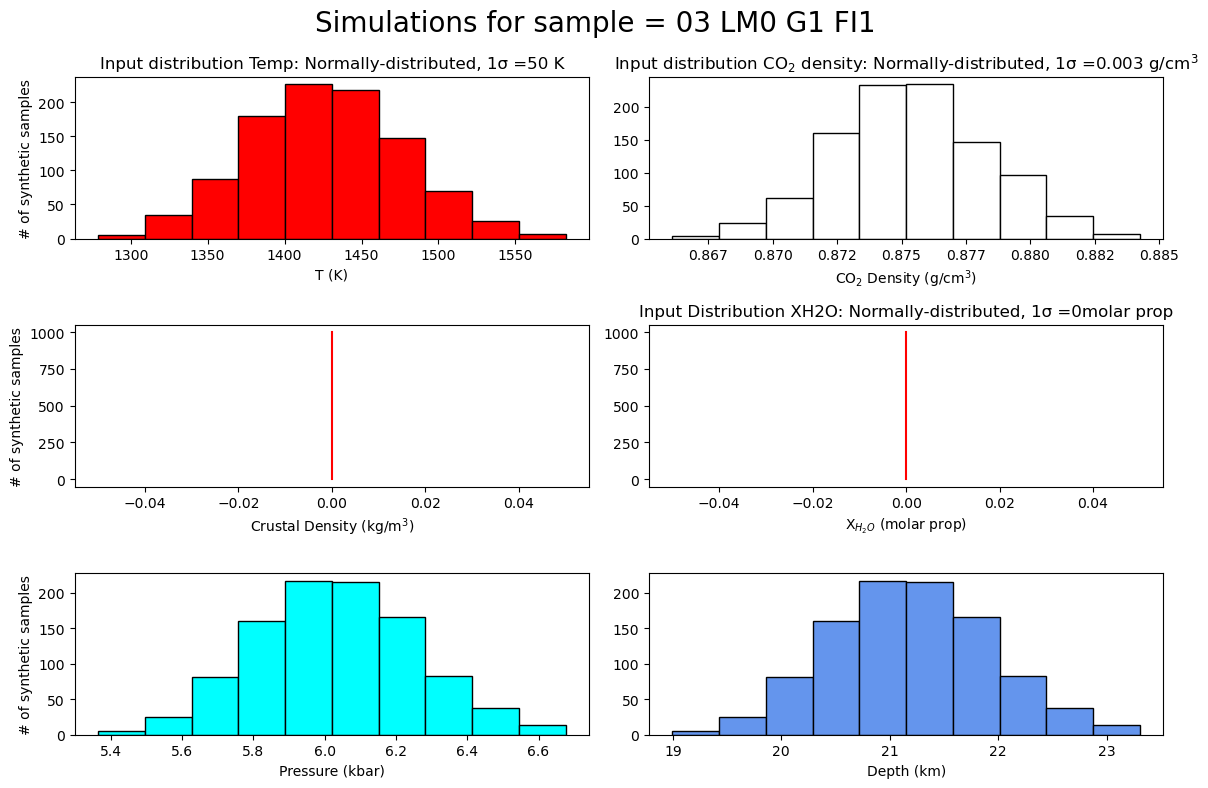

In [6]:
MC_Av, MC_All, fig=pf.propagate_FI_uncertainty(
T_K=1150+273.15,
error_T_K=50, 
error_type_T_K='Abs', 
error_dist_T_K='normal',
CO2_dens_gcm3=data['Density (g/cm^3)'],
error_CO2_dens=0.002925, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=data['FileName'],
model='two-step', d1=14, rho1=2800, rho2=3100,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av.head()

In [7]:
# This returns 2 dataframes, one showing the mean and standard deviation of the simulation for each fluid inclusion
MC_Av.head()

,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.031485,6.026854,0.222039,0.219125,21.188075,21.172847,0.730127,0.720544,1423.15,50,0.875343,0.002925,None,0.0,two-step,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.714673,4.712628,0.187193,0.188277,16.858021,16.851298,0.615543,0.619108,1423.15,50,0.780430,0.002925,None,0.0,two-step,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.020079,7.023037,0.259320,0.266165,24.438851,24.448577,0.852716,0.875226,1423.15,50,0.936785,0.002925,None,0.0,two-step,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.870309,6.867972,0.247936,0.246916,23.946364,23.938680,0.815284,0.811931,1423.15,50,0.928828,0.002925,None,0.0,two-step,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.869369,6.874090,0.253193,0.259509,23.943273,23.958798,0.832571,0.853339,1423.15,50,0.928514,0.002925,None,0.0,two-step,SW96


In [8]:
# The second output shows every single simulation for each FI. So the first N rows are for the first FI, then next N rows for the next, etc. 
MC_All.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),MC_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,03 LM0 G1 FI1,6.121520,612.151979,21.484133,None,two-step,1456.265617,0.872784
1,03 LM0 G1 FI1,5.747624,574.762434,20.254659,None,two-step,1364.131195,0.874644
2,03 LM0 G1 FI1,6.452705,645.270453,22.573163,None,two-step,1508.484791,0.879484
3,03 LM0 G1 FI1,6.292424,629.242358,22.046114,None,two-step,1482.444938,0.876493
4,03 LM0 G1 FI1,6.435249,643.524923,22.515765,None,two-step,1517.705758,0.875919


### Lets segment for the eruption sample
- These are 'Logicals' e.g. a list of True and False statements, these allow us to splice up the dataframe for each sample

In [10]:
sam0=data['SAMPLE']==0 # this gives a list of true and false for sample = 0
sam1=data['SAMPLE']==2
sam4=data['SAMPLE']==4
sam6=data['SAMPLE']==6

In [12]:
## For example, lets get the data for sample 6
data.loc[sam6].head()

,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
90,6,01 LM6 G1 FI1,0.833430,LM6_G1_CORE2,0.000013,41.97921,39.79742,0.016172,0.000023,0.000012,0.244621,0.039359,18.16324,0.289626,0.025383,0.200139,100.7552,0.804681
91,6,07 LM6 G1 FI4,0.831903,LM6_G1_CORE3,0.007265,41.50474,40.45826,0.021972,0.000023,0.001032,0.254588,0.019733,17.99747,0.307189,0.015767,0.176755,100.7648,0.804335
92,6,03 LM6 G1 FI2,0.879573,LM6_G1_NEARMI,0.019585,41.74017,39.96414,0.049670,0.000023,0.004542,0.251532,0.040087,18.45561,0.240858,0.020140,0.172209,100.9586,0.801251
93,6,05 LM6 G1 FI3,0.796166,LM6_G1_NEARMI,0.019585,41.74017,39.96414,0.049670,0.000023,0.004542,0.251532,0.040087,18.45561,0.240858,0.020140,0.172209,100.9586,0.801251
94,6,72 LM6 G10 FI1,0.848642,LM6_G10_CENTER,0.045207,42.88505,40.72833,0.171445,0.019677,0.014681,0.371840,0.060140,17.00363,0.246182,0.000881,0.212640,101.7597,0.818041


## Lets plot each FI depth and its error bar, colored by sample (as in Dayton et al. 2023)

Text(0, 0.5, 'Pressure (kbar)')

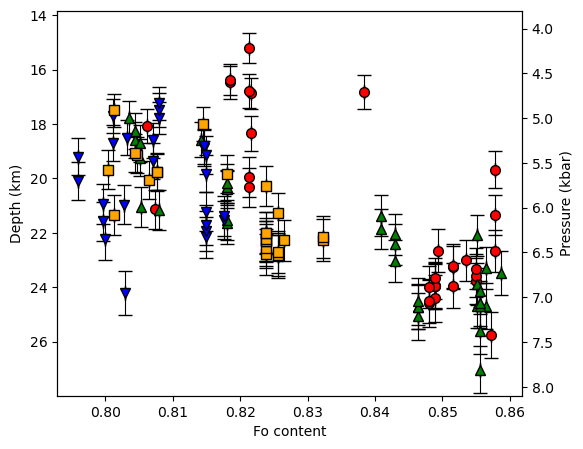

In [15]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
# This plots a symbol with its error bar for sample 0
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleCalc_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km_from_percentile'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 1
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleCalc_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km_from_percentile'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 4
ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleCalc_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km_from_percentile'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)

# This plots a symbol with its error bar for sample 6
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleCalc_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km_from_percentile'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax1.invert_yaxis()
ax2=ax1.twinx()
ax2.invert_yaxis()
# This sets the range of pressures you want
Plim1=3.8
Plim2=8.1
ax2.set_ylim([Plim2, Plim1])
# This calculates the corresponding depths for those pressures. 
D_Plim1=pf.convert_pressure_depth_2step(P_kbar=Plim1, d1=14, rho1=2800, rho2=3100, g=9.81)
D_Plim2=pf.convert_pressure_depth_2step(P_kbar=Plim2, d1=14, rho1=2800, rho2=3100, g=9.81)
ax1.set_ylim([D_Plim2, D_Plim1])
ax2.set_ylabel('Pressure (kbar)')

## Complex double axis aligning
- The plot above was relatively easy, because we were always working below the density transition from layer 1 to layer 2
- Be careful - if your density transition lies in the range, showing the axes is very complicated! 
- One option is presented here. 
https://stackoverflow.com/questions/59349185/non-linear-second-axis-in-matplotlib